In [2]:
import numpy as np
import pandas as pd
import torch
from collections import Counter
import matplotlib.pyplot as plt

import random
import os
import re
import json
import nltk


In [3]:
os.chdir('/semantic_tvd_generations')

merged_dict = {}

tvd_sem_oracle1_oracle2 = []
tvd_sem_human_model = []
general = []

input_data = ['test0-100.json', 'test101-200.json', 'test201-300.json', 'test301-400.json', 'test401-500.json', 
                'test501-600.json','test601-700.json','test701-800.json','test801-900.json','test901-1000.json',
                'test1001-1100.json', 'test1101-1200.json', 'test1201-1300.json', 'test1301-1400.json',
                'test1401-1500.json', 'test1501-1600.json', 'test1601-1700.json', 'test1701-1800.json',
                'test1801-1900.json', 'test1901-2000.json', 'test2001-2100.json', 'test2101-2200.json',
                'test2201-2300.json', 'test2301-2400.json', 'test2401-2500.json', 'test2501-2600.json', 'test2601-2686.json']

for filename in input_data:
        f = open(filename)
        data = json.load(f)
        f.close()
        
        for key, value in data.items():
                merged_dict[key] = value
        
        for key in data.keys():
                tvd_sem_oracle1_oracle2.append(data[key]['tvd_sem_oracle1_oracle2'][0])
                tvd_sem_human_model.append(data[key]['tvd_sem_human_model'][0])
                general.append(data[key]['general'])


In [6]:
bins = np.histogram_bin_edges(np.concatenate([tvd_sem_human_model, tvd_sem_oracle1_oracle2]), bins=15)

In [7]:
len(tvd_sem_oracle1_oracle2)

2687

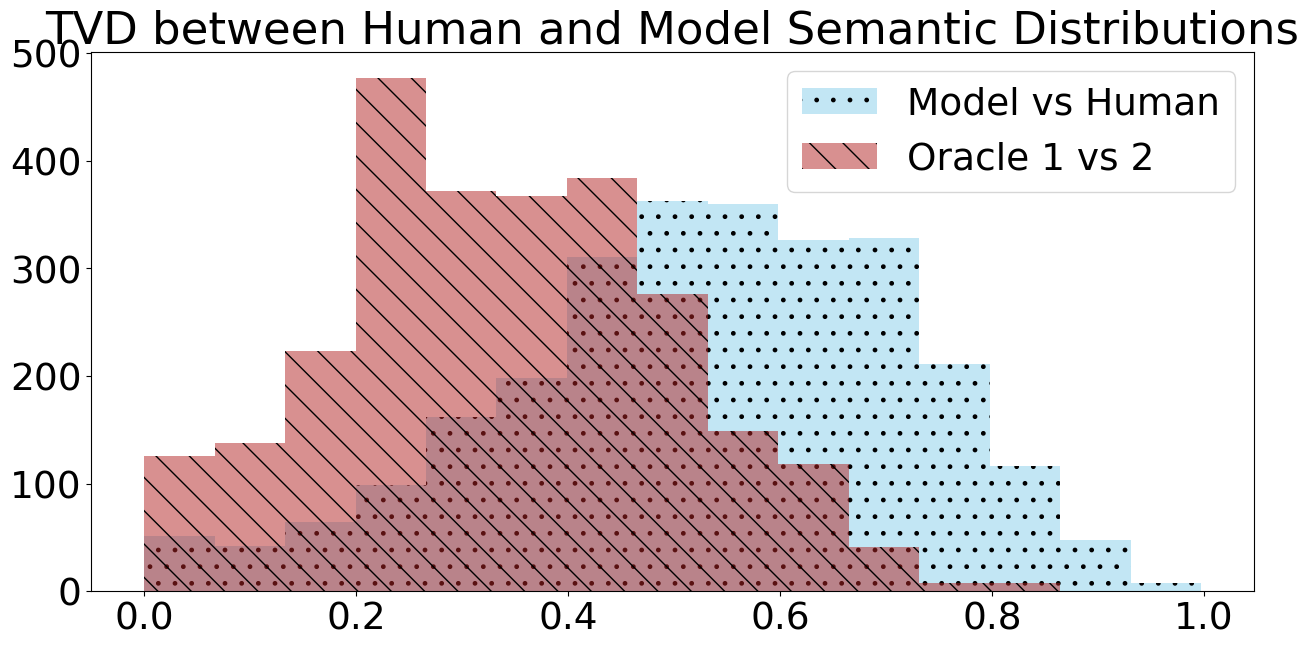

In [8]:
plt.rc('font', size=27)
plt.subplots(figsize=(15, 7))
plt.hist(tvd_sem_human_model, bins=bins, alpha=0.5, label='Model vs Human', color='Skyblue', hatch='.')
plt.hist(tvd_sem_oracle1_oracle2, bins=bins, alpha=0.5, label='Oracle 1 vs 2', color='firebrick', hatch='\\')
plt.legend(fontsize="27", loc = 'upper right')
plt.title('TVD between Human and Model Semantic Distributions')
plt.savefig('TVDsemantic.pdf', format="pdf",bbox_inches='tight')

plt.show()